# Handwritten digits classification using CNN


In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

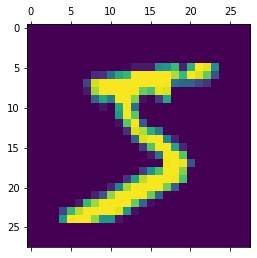

In [6]:

plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

# Using ANN for classification

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2673 - accuracy: 0.9248
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1227 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0859 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0850 - accuracy: 0.9767


[0.08503936976194382, 0.9767000079154968]

In [11]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

# Using CNN for classification

In [13]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1503 - accuracy: 0.9549
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0154 - accuracy: 0.9950


In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0415 - accuracy: 0.9872


[0.04152589663863182, 0.9872000217437744]